**Credit Card Customers Segmentation Analysis**

**Import the Libraries**

In [1]:
# for basic mathematics operation 
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

**Reading the Dataset**

In [2]:
# importing the dataset
data = pd.read_csv('Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# describing the data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# checking if there is any NULL data
data.isnull().sum(axis = 0)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Visualization

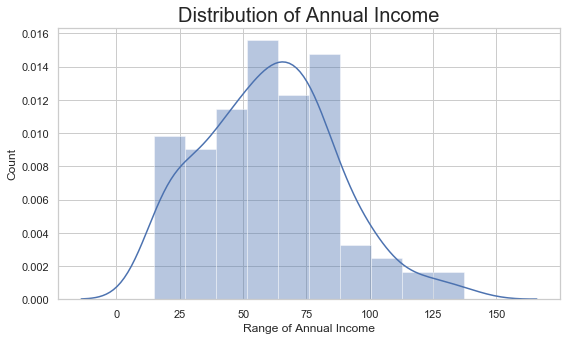

In [9]:
plt.figure(figsize=(8,5))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')
plt.show()

/Users/akbar.maulana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


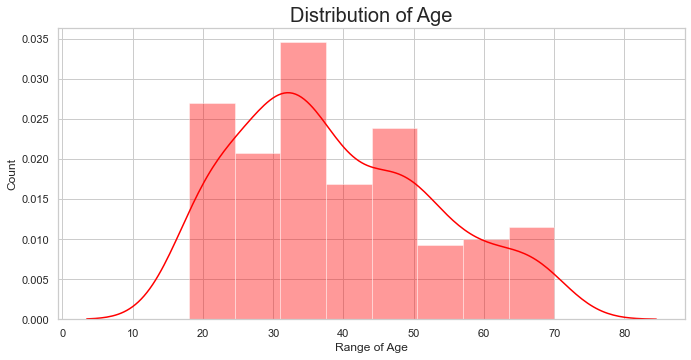

In [7]:
plt.figure(figsize=(10,5))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

/Users/akbar.maulana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


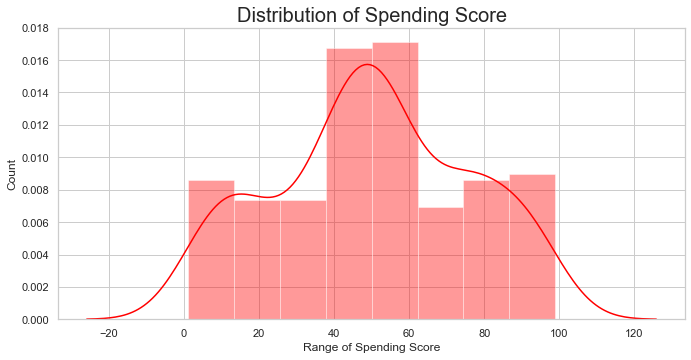

In [8]:
plt.figure(figsize=(10,5))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'], color = 'red')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.xlabel('Range of Spending Score')
plt.ylabel('Count')
plt.show()

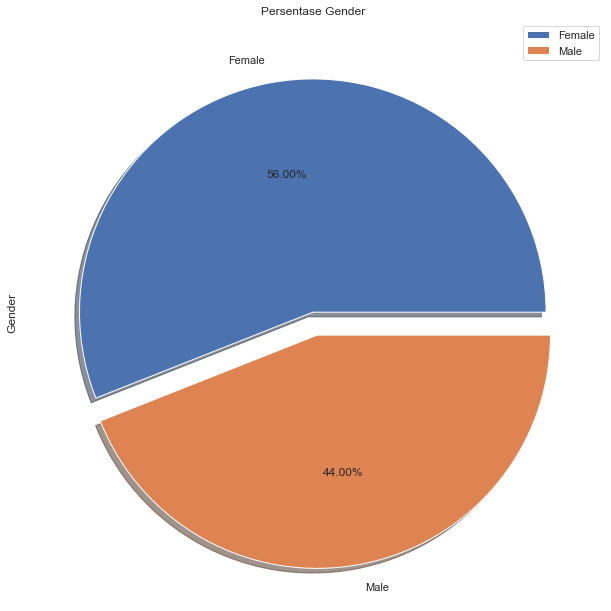

In [9]:
plt.figure(figsize=(10,10))
data['Gender'].value_counts().plot.pie(shadow=True, explode = [0,0.1],autopct='%1.2f%%')
plt.title("Persentase Gender")
plt.legend()
plt.show()

<Figure size 1440x720 with 0 Axes>

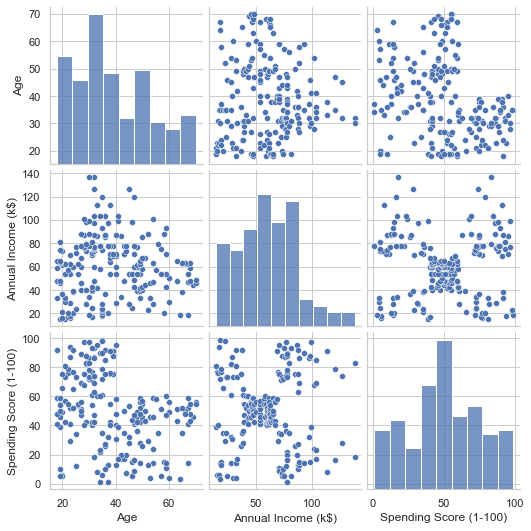

In [10]:
plt.figure(figsize=(20,10))
sns.pairplot(data.drop(labels=['CustomerID'],axis=1))
plt.show()

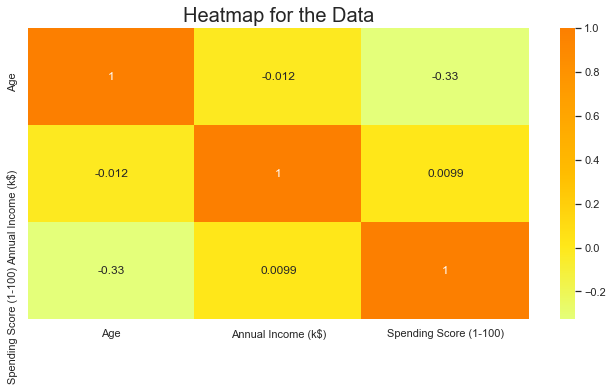

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(data.drop(labels=['CustomerID'],axis=1).corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

/Users/akbar.maulana/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


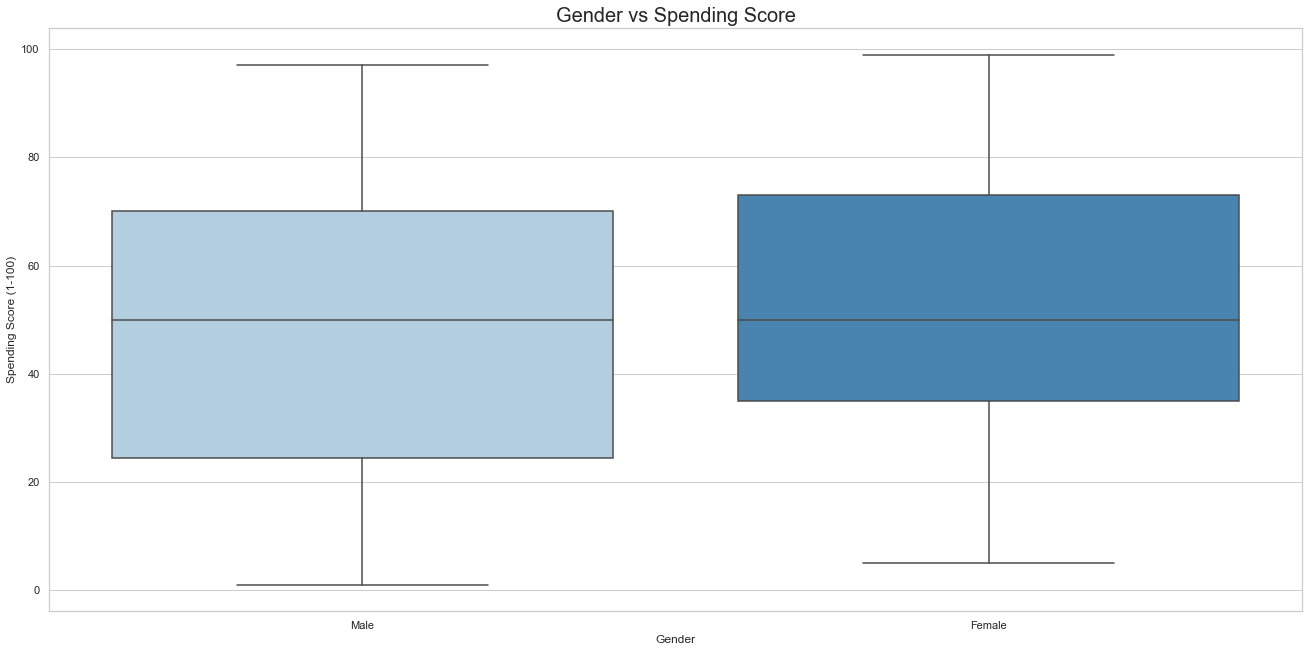

In [12]:
#  Gender vs Spendscore
plt.figure(figsize=(20,10))
sns.boxplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

/Users/akbar.maulana/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


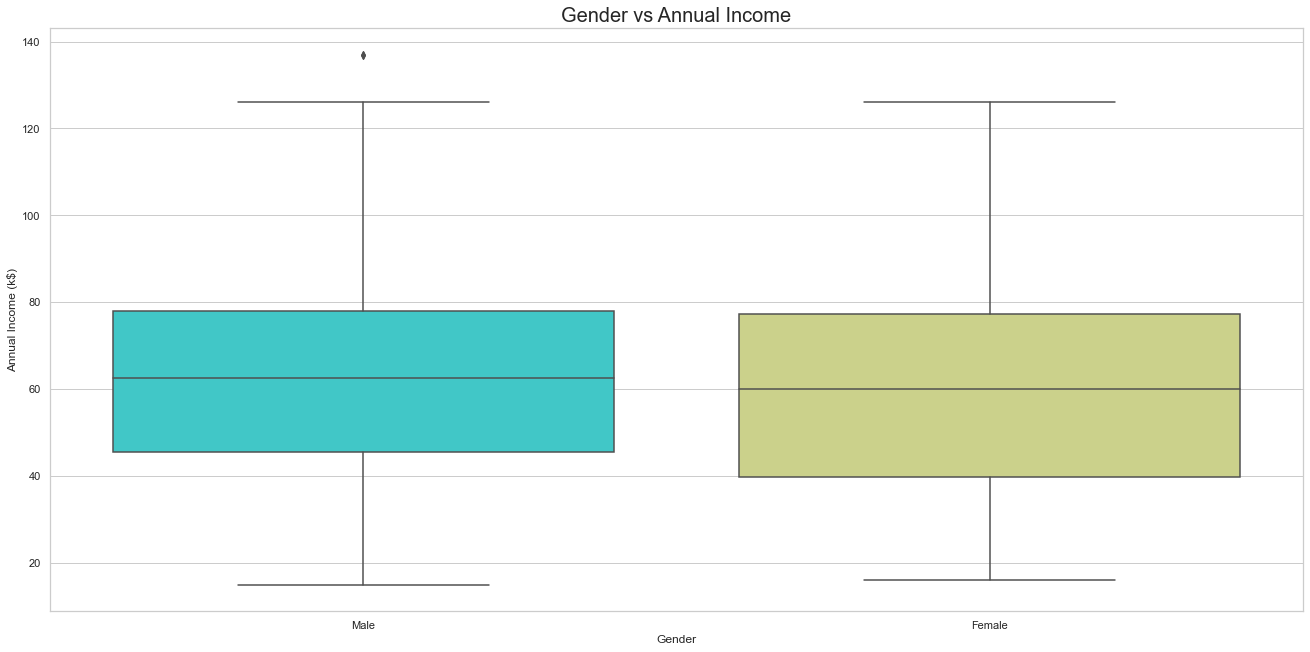

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(data['Gender'], data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Annual Income', fontsize = 20)
plt.show()

/Users/akbar.maulana/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


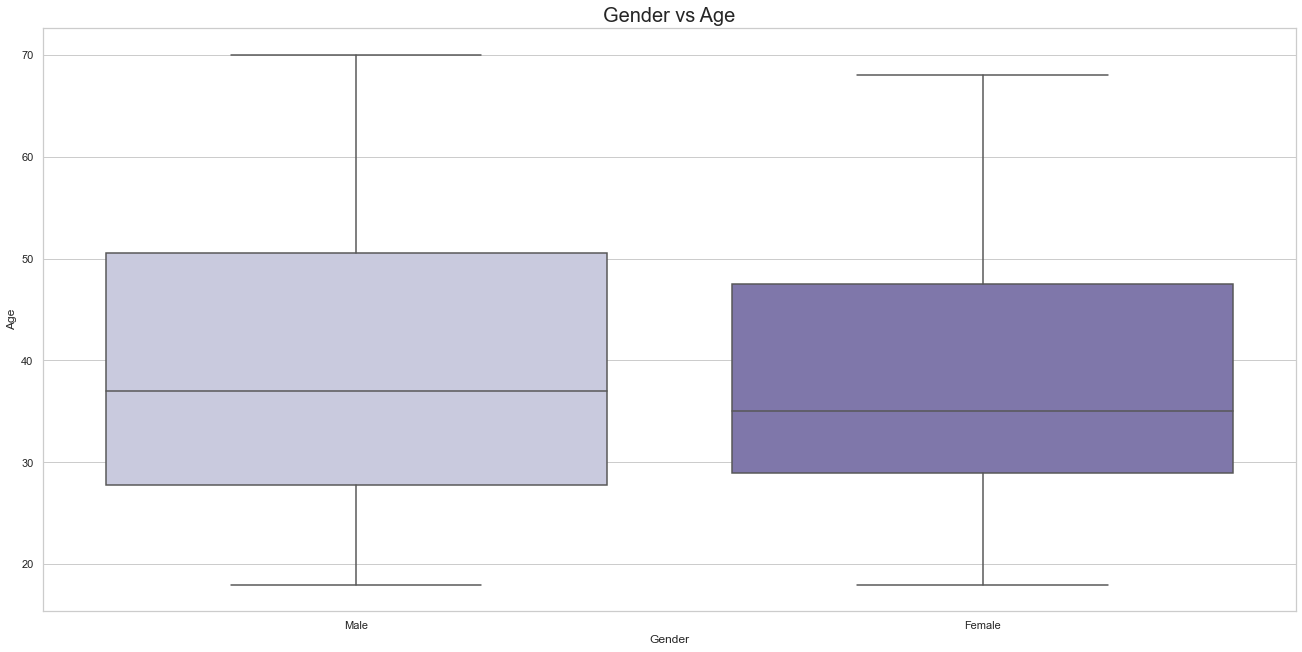

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(data['Gender'], data['Age'], palette = 'Purples')
plt.title('Gender vs Age', fontsize = 20)
plt.show()

## Clustering Analysis

In [16]:
df_cluster= data.iloc[:, [2, 3, 4]]
df_cluster

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


## Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

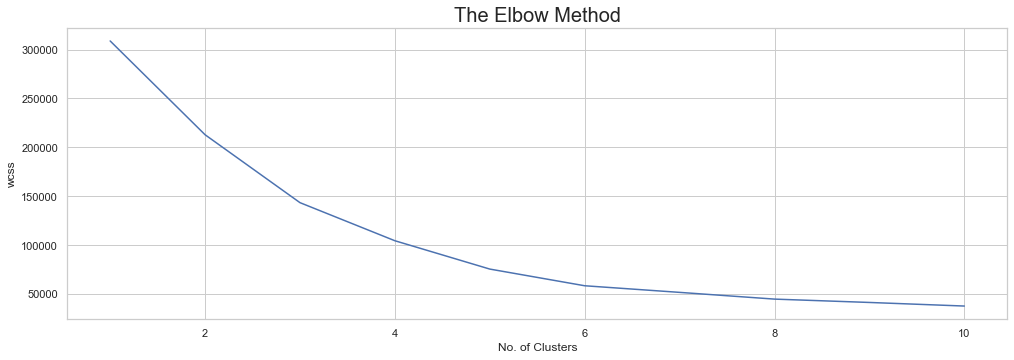

In [17]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    km.fit(df_cluster)
    wcss.append(km.inertia_)
    
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**Visualizaing the Clusters**

In [19]:
km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 123)
cluster = km.fit_predict(df_cluster)

In [20]:
cluster

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [21]:
df_cluster['cluster']=cluster

<ipython-input-21-8314b714026f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['cluster']=cluster


In [22]:
hasil1=df_cluster.groupby(['cluster']).agg({"Age":"mean","Annual Income (k$)":"mean","Spending Score (1-100)":"mean"}).reset_index()
hasil1

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,45.217391,26.304348,20.913043
1,1,43.282051,55.025641,49.692308
2,2,32.692308,86.538462,82.128205
3,3,40.324324,87.432432,18.189189
4,4,25.521739,26.304348,78.565217


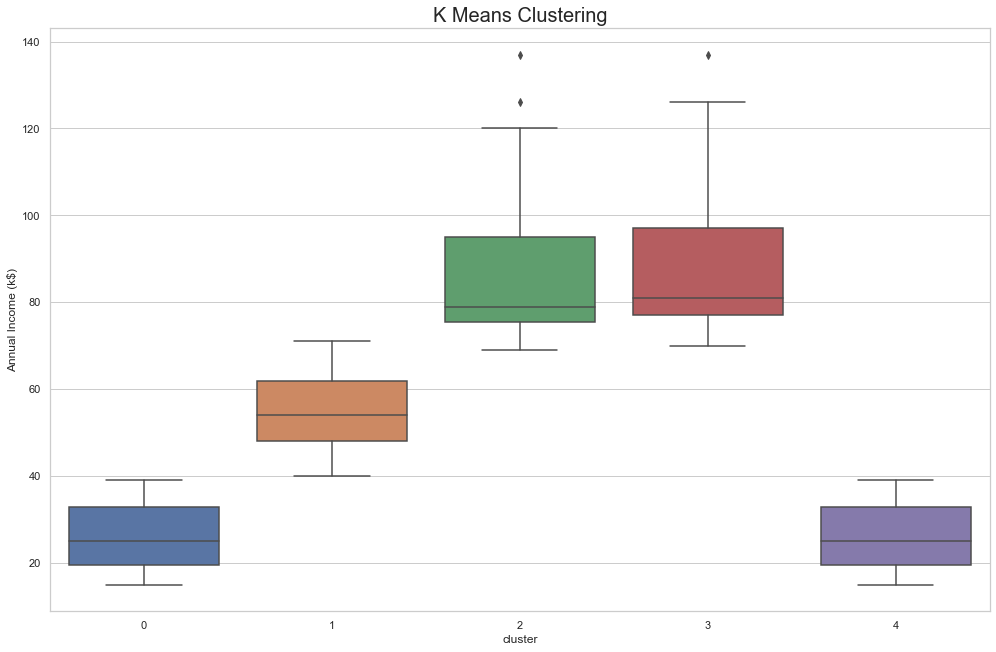

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df_cluster['cluster'],y=df_cluster['Annual Income (k$)'])
plt.title('K Means Clustering', fontsize = 20)
plt.show()

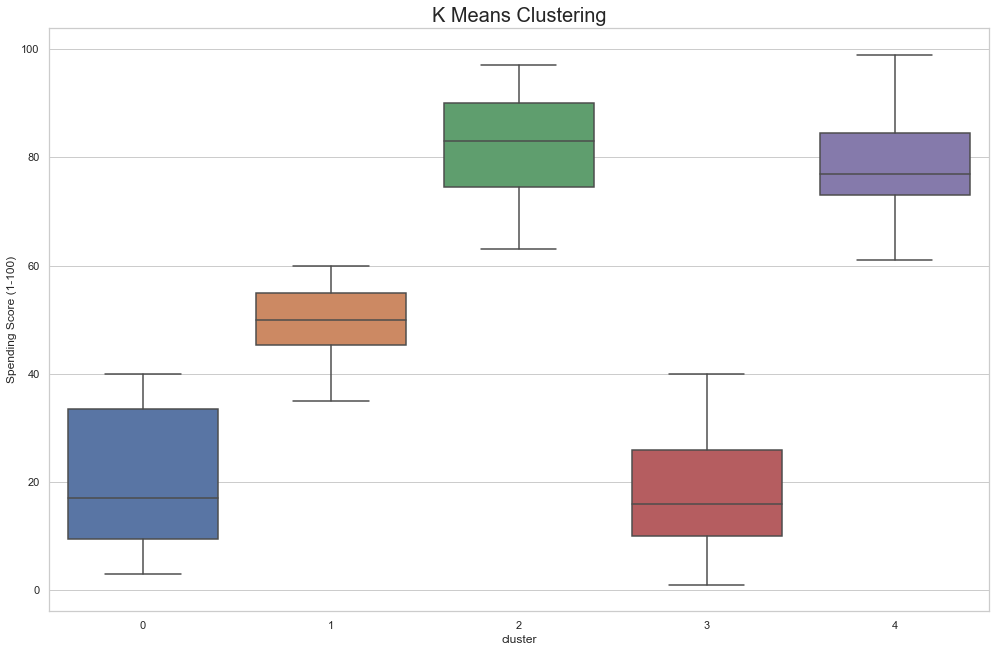

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df_cluster['cluster'],y=df_cluster['Spending Score (1-100)'])
plt.title('K Means Clustering', fontsize = 20)
plt.show()

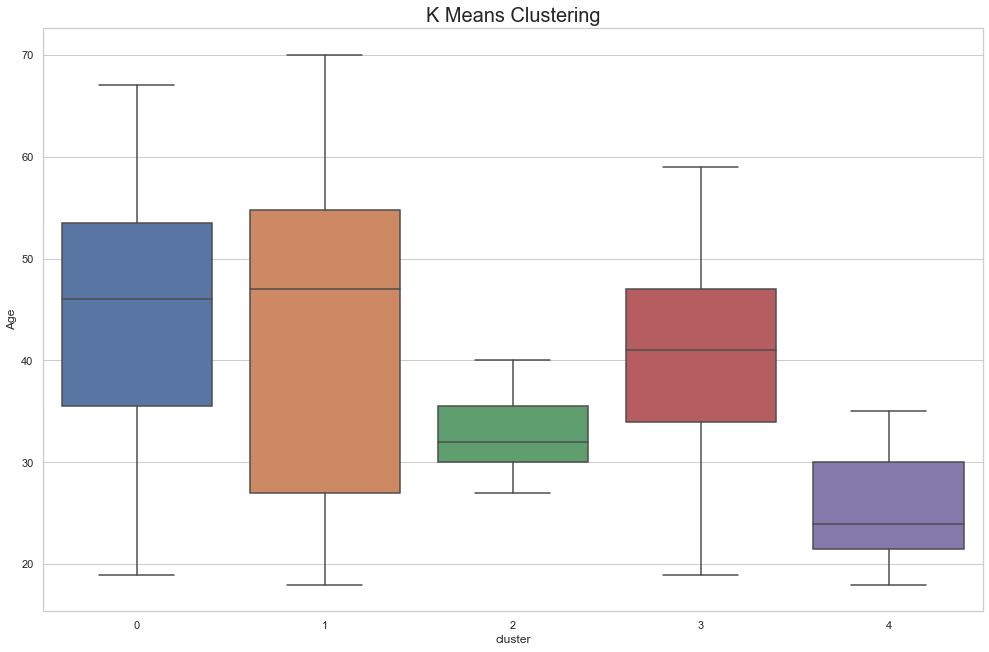

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df_cluster['cluster'],y=df_cluster['Age'])
plt.title('K Means Clustering', fontsize = 20)
plt.show()

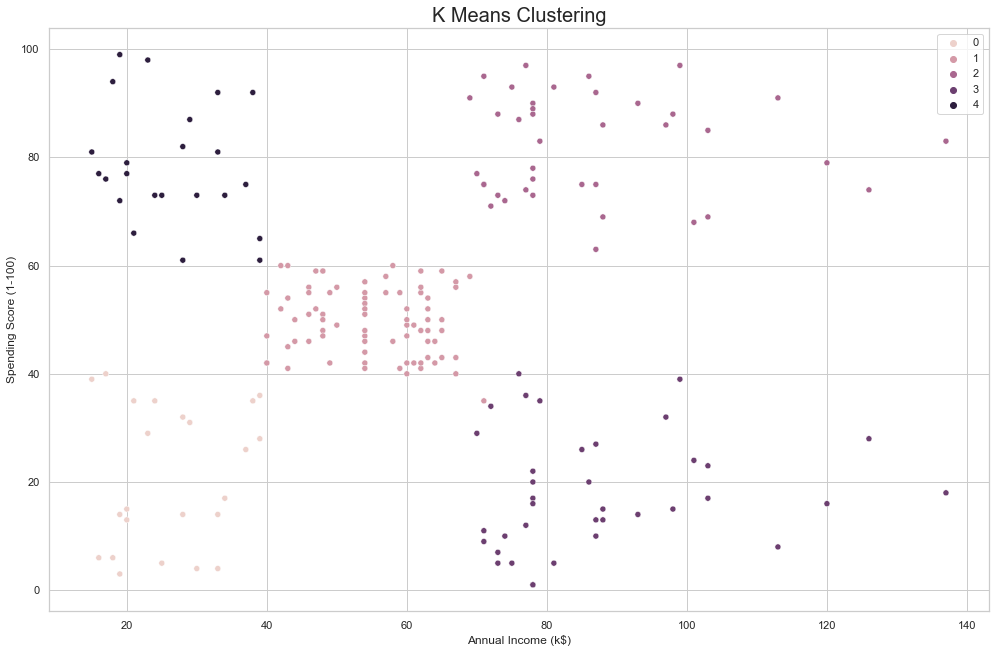

In [27]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df_cluster['Annual Income (k$)'],y=df_cluster['Spending Score (1-100)'], hue=df_cluster["cluster"])
plt.title('K Means Clustering', fontsize = 20)
plt.legend()
plt.show()